In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
files = {}
sample_number = 10

for i in np.arange(sample_number):
    files["run_"+str(i+1)+ ".txt"] = np.loadtxt("C:/Users/cilli/DIAS.cpp/Run_files4.0/run_"+str(i+1)+".txt", delimiter = ",")
    files["run_ds"+str(i+1)+".txt"] = np.loadtxt("C:/Users/cilli/DIAS.cpp/Run_files4.0/run_ds"+str(i+1)+".txt",delimiter = ",")

In [17]:

sols = {}
index = int(len(files["run_1.txt"]) / 8)
for i in np.arange(sample_number):
    
    sols["sol_"+str(i+1)] = np.array([
        files["run_"+str(i+1)+".txt"][:index],files["run_"+str(i+1)+".txt"][index:2*index],
        files["run_"+str(i+1)+".txt"][2*index:3*index],files["run_"+str(i+1)+".txt"][3*index:4*index],
        files["run_"+str(i+1)+".txt"][4*index:5*index],files["run_"+str(i+1)+".txt"][5*index:6*index],
        files["run_"+str(i+1)+".txt"][6*index:7*index],files["run_"+str(i+1)+".txt"][7*index:8*index]
    ])
    
    sols["sol_ds"+str(i+1)] = np.array([
        files["run_ds"+str(i+1)+".txt"][:index],files["run_ds"+str(i+1)+".txt"][index:2*index],
        files["run_ds"+str(i+1)+".txt"][2*index:3*index],files["run_ds"+str(i+1)+".txt"][3*index:4*index],
        files["run_ds"+str(i+1)+".txt"][4*index:5*index],files["run_ds"+str(i+1)+".txt"][5*index:6*index],
        files["run_ds"+str(i+1)+".txt"][6*index:7*index],files["run_ds"+str(i+1)+".txt"][7*index:8*index]
    ])

In [18]:
def distance(sols_i, sols_dsi):
    return np.sqrt(
        (sols_i[0] - sols_dsi[0])**2 + (sols_i[1] - sols_dsi[1])**2 + (sols_i[2] - sols_dsi[2])**2 +
        (sols_i[3] - sols_dsi[3])**2 + (sols_i[4] - sols_dsi[4])**2 + (sols_i[5] - sols_dsi[5])**2 +
        (sols_i[6] - sols_dsi[6])**2 + (sols_i[7] - sols_dsi[7])**2
    )

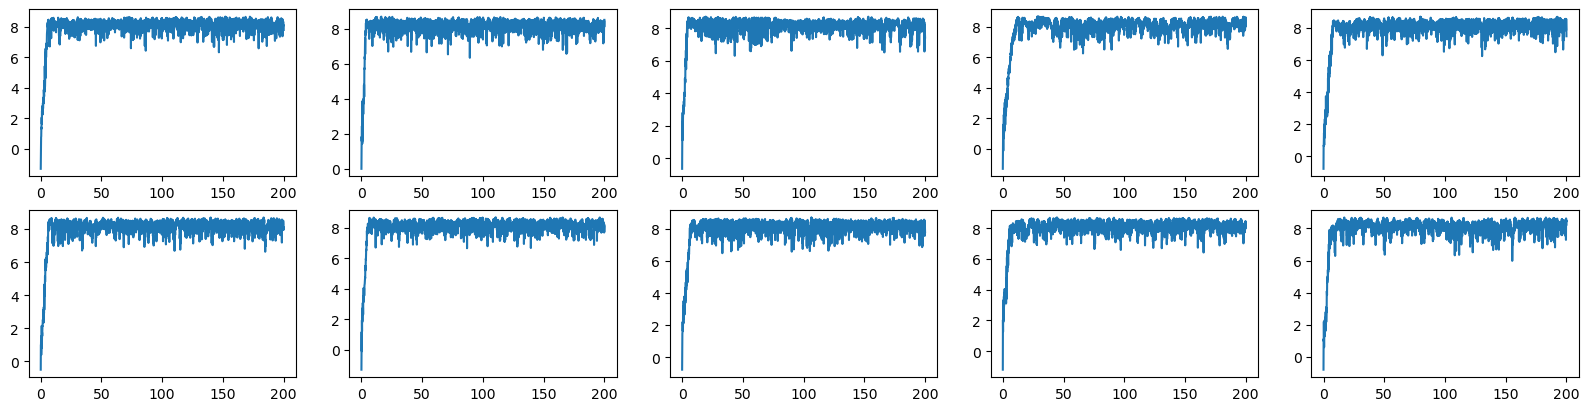

In [19]:
distances = {}
for i in np.arange(sample_number):
    distances["dist"+str(i+1)] = distance(sols["sol_"+str(i+1)],sols["sol_ds"+str(i+1)])

times = np.linspace(0,len(distances["dist1"]) / 10 , len(distances["dist1"]))

plt.figure(figsize = (20,10))
for i in np.arange(sample_number):
    plt.subplot(4,5,i+1)
    plt.plot(times, np.log(distances["dist"+str(i+1)]))